In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [42]:
image=cv2.imread('GreenUnoCard.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #convert from BGR to RGB
width=600 #resize for faster processing

2.4193548387096775


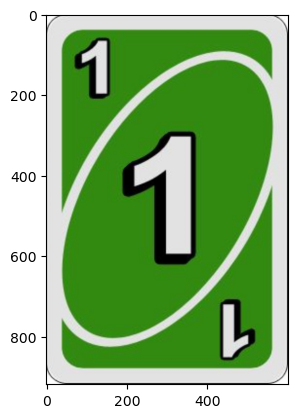

In [43]:
(h,w)=image.shape[:2]
aspect_ratio=width/float(w)
print(aspect_ratio)
height=int(h*aspect_ratio)
resized_image=cv2.resize(image,(width,height))
plt.imshow(resized_image)

In [44]:
hsv_image=cv2.cvtColor(resized_image,cv2.COLOR_RGB2HSV)
hsv_image_reshaped=hsv_image.reshape((hsv_image.shape[0]*hsv_image.shape[1],3))

In [45]:
#Get dominant color
k=4
#print(image.shape)
kmeans=KMeans(n_clusters=k)
kmeans.fit(hsv_image_reshaped)
counts=np.bincount(kmeans.labels_)


C:\Users\HP\anaconda3\envs\tolga1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
counts

array([145440, 355168,  17339,  33453], dtype=int64)

In [47]:
dominant_color_hsv=kmeans.cluster_centers_[np.argmax(counts)]

In [48]:
print(dominant_color_hsv)

[ 52.53618137 221.29505954 132.4569909 ]


In [49]:
#classify the detected color
hsv_color=dominant_color_hsv
hue,saturation,value=hsv_color
if hue<15 or hue>345:
    color_name='Red'
elif 15<=hue and hue<45:
    color_name='Yellow'
elif 45<=hue and hue<75:
    color_name='Green'
elif 75<=hue and hue<165:
    color_name='Blue'
else:
    color_name='Other'
print(color_name)

Green
